### QC SVM

In [99]:
import pandas as pd

df = pd.read_csv('qc_svm_results_3464_2412182130.csv')

### QC RNA

In [97]:
import pandas as pd

df = pd.concat([pd.read_csv('qc_rna_results_3464_241218loop_MLP BoW.csv'),
                pd.read_csv('qc_rna_results_3464_251218loop_MLP TFIDF.csv'),
                pd.read_csv('qc_rna_results_3464_251218loop_MLP W2V.csv'),
                pd.read_csv('qc_rna_results_3464_251218loop_MLP Hybrid.csv'),
               ])

In [94]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np


COLOR_PALETTE = ['#4878CF', '#6ACC65', '#D65F5F', '#B47CC7', '#C4AD66', '#77BEDB']

def my_plot_(df, metric='f1', ylabel=None, path_save=None, save_format='eps'):
    plt.figure(num=None, figsize=(7, 5), dpi=200, facecolor='w', edgecolor='k')
    for i, model in enumerate(df.Model.unique()):
        data_x = df.train_size[df.Model == model].values
        data_y = df[metric][df.Model == model].values
        plt.plot(data_x, data_y, label=model, color=COLOR_PALETTE[i])
    
    plt.legend()
    plt.xlabel('Tamanho do conjunto de treinamento')
    if ylabel is None:
        plt.ylabel(metric)
    else:
        plt.ylabel(ylabel)
    _max = df['train_size'].max()
    plt.xlim(0, df['train_size'].max())
    plt.xticks([0,df['train_size'].max()/4,(df['train_size'].max()/4)*2,(df['train_size'].max()/4)*3,_max])
    if path_save is not None:
        plt.savefig(path_save, dpi=100, format=save_format)
    plt.show()

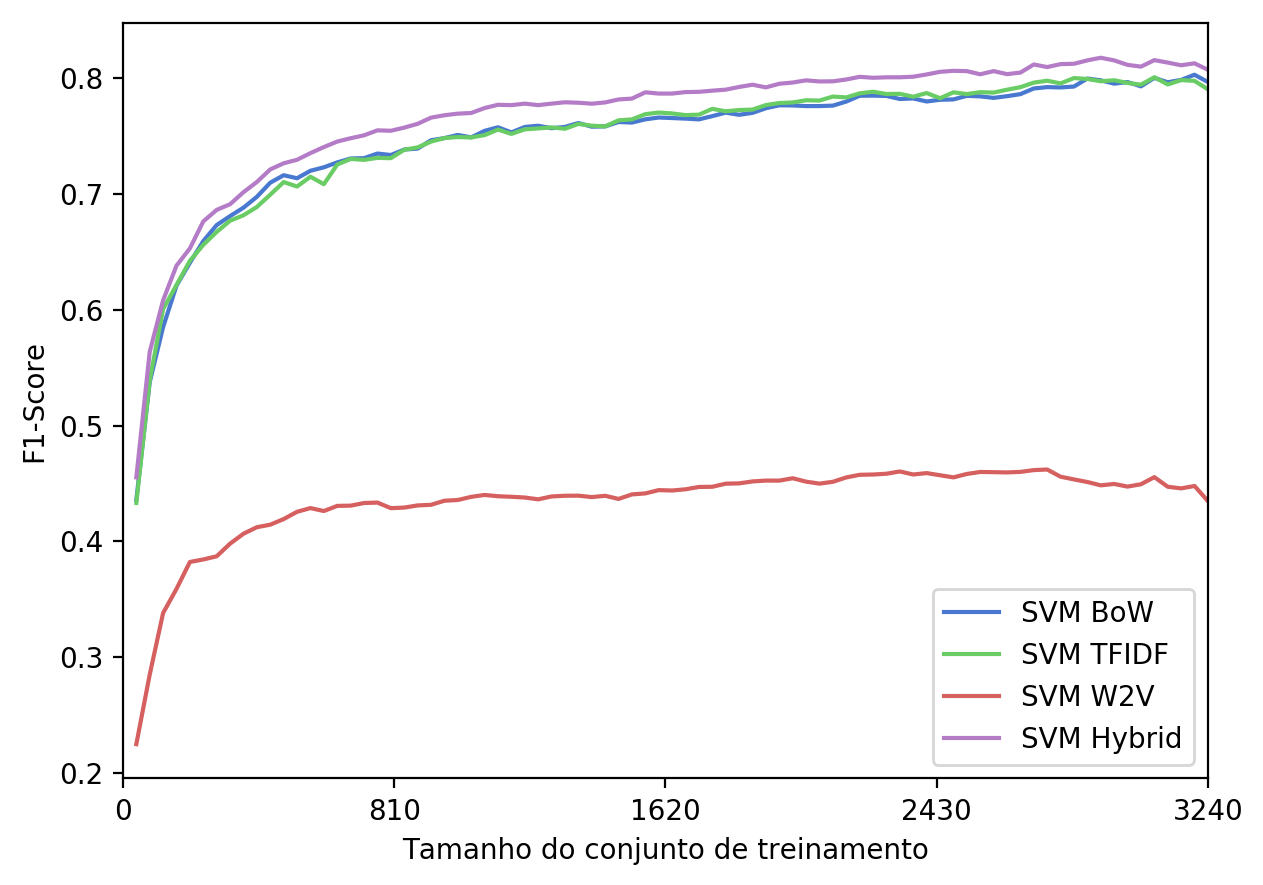

In [100]:
my_plot_(df, metric='f1', ylabel='F1-Score', path_save='qc_*.eps')

### UTIL

In [75]:
df = df.drop(df[df.Model == 'SVM Hybrid'].index, axis=0)

In [76]:
df['Model'].replace('SVM Hybrid B', 'SVM Hybrid', inplace=True)

In [ ]:
my_plot(df)

In [ ]:
import pandas as pd


qc_lstm = pd.read_csv('lstm_results.csv')

qc_mlp_bow = pd.read_csv('mlp_bow_results.csv')

qc_mlp_hybrid = pd.read_csv('mlp_hybrid_results.csv')

qc_mlp_hybrid_b = pd.read_csv('mlp_hybridb_results.csv')

qc_tfidf = pd.read_csv('mlp_tfidf_results.csv')

qc_w2v = pd.read_csv('mlp_w2v_results.csv')

qc_nbbl = pd.read_csv('nbbl_all_results.csv')

qc_svm = pd.read_csv('qc_svm_results.csv')

qc_mlp = pd.concat([qc_mlp_bow, qc_tfidf, qc_w2v, qc_mlp_hybrid, qc_mlp_hybrid_b])

In [ ]:
my_plot(qc_lstm)

In [ ]:
my_plot(qc_mlp, names=['MLP BoW', 'MLP TFIDF', 'MLP W2V', 'MLP Hybrid'])

In [ ]:
plt.savefig('qc_mlp.eps', format='eps', dpi=100)

In [ ]:
my_plot(qc_nbbl)

In [ ]:
my_plot(qc_svm)

In [104]:
df.Model.unique()

array(['SVM BoW', 'SVM TFIDF', 'SVM W2V', 'SVM Hybrid'], dtype=object)

In [117]:


def plot_confusion_matrices(df):
    
    fig = plt.figure()
    
    coordinates = [111, 121, 211, 221]
    
    for i, model in enumerate(df.Model.unique()):
        print(model)
        ax = fig.add_subplot(coordinates[i])
        plot_confusion_matrix(df[df['Model'] == model]['confusion'].values, ['1', '1', '1', '1', '1', '1', '1'], ax, True)
    plt.show()
        

In [133]:
df.confusion[10]

'[[437.   48.8  28.4  32.8  65.   70.6  44.6]\r\n [ 26.  242.4  80.4  96.8 116.2 101.   82.2]\r\n [ 28.2  74.4 254.8  49.6  74.6  79.4  57.2]\r\n [  8.   20.   13.   29.2  26.6  19.4  11.8]\r\n [ 21.2  54.2  40.8  41.4  69.4  49.6  43.2]\r\n [ 59.6  60.   47.6  69.   88.6 208.4  39.6]\r\n [ 21.2  24.8  20.8  25.   33.6  35.6  72. ]]'

SVM BoW


ValueError: could not convert string to float: '[[4.004e+02 4.880e+01 9.620e+01 9.800e+01 1.008e+02 2.100e+02 4.220e+01]\r\n [8.800e+00 3.264e+02 4.420e+01 3.540e+01 7.500e+01 3.040e+01 4.680e+01]\r\n [4.000e-01 1.180e+01 1.988e+02 9.200e+00 3.080e+01 9.000e+00 4.400e+00]\r\n [7.380e+01 9.400e+00 1.360e+01 5.540e+01 3.200e+01 1.440e+01 5.200e+00]\r\n [8.440e+01 1.046e+02 1.070e+02 1.098e+02 1.844e+02 7.740e+01 5.700e+01]\r\n [4.600e+01 1.620e+01 2.180e+01 3.120e+01 3.520e+01 2.296e+02 1.080e+01]\r\n [3.600e+00 2.060e+01 1.580e+01 1.240e+01 2.520e+01 6.600e+00 1.928e+02]]'

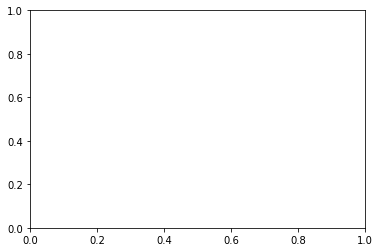

In [118]:
plot_confusion_matrices(df)

In [102]:
def plot_confusion_matrix(cm, classes, ax, normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.title('Matriz de Confusão')
    ax.colorbar()
    tick_marks = np.arange(len(classes))
    ax.xticks(tick_marks, classes, rotation=45)
    ax.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    ax.tight_layout()
    ax.ylabel('Valor Verdadeiro')
    ax.xlabel('Valor Previsto')
    return ax